In [2]:
import numpy as np
import scipy as sp
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

## 1.Numpy
Full Reference : https://docs.scipy.org/doc/numpy/user/
    * Arrays
    * Array Creating
    * Array Indexing
    * Array Math
    * Broadcasting

### 1.0.Arrays
    * A numpy array is a grid of values, all of the same type;
    * It is indexed by a tuple of nonnegative integers;
    * The number of dimensions is the rank of the array; 
    * The shape of an array is a tuple of integers giving the size of the array along each dimension.

In [7]:
a = np.array([1, 2, 3])
print(a.ndim)      # rank
print(a.shape)     # shape
print(a.size)      # number of array items
print(a.dtype)     # data type
print(a.itemsize)  # size of each item in array

1
(3,)
3
int64
8


In [28]:
print('array a:')
a = np.array([1, 2, 3])   # Create a rank 1 array
print(type(a))            # Prints "<class 'numpy.ndarray'>"
print(a.shape)            # Prints "(3,)"
print(a[0], a[1], a[2])   # Prints "1 2 3"
a[0] = 5                  # Change an element of the array
print(a)                  # Prints "[5, 2, 3]"         

array a:
<class 'numpy.ndarray'>
(3,)
1 2 3
[5 2 3]


In [29]:
print('array b:')
b = np.array([[1,2,3],[4,5,6]])    # Create a rank 2 array
print(b.shape)                     # Prints "(2, 3)"
print(b[0, 0], b[0, 1], b[1, 0])   # Prints "1 2 4"
print(b[0].shape)       

array b:
(2, 3)
1 2 4
(3,)


In [12]:
print('array c:')
c = np.array([[1, 2, 3], [4, 5]])  # Create a ((3,), (2,)) array
print(c.shape)                     # Prints "(2,)"
print(c.dtype)
print(c[0].shape)  

array c:
(2,)
object


AttributeError: 'list' object has no attribute 'shape'

### 1.1.Array Creation
    * convert python lists to array : mat = np.array([...])
    * Use built-in function to create specific array: mat = np.func((dim_1, dim2))
    * random generating array: np.random.randn(dim1, dim2)
    * load the stored array: mat = np.load(name)

In [21]:
# Convert python lists

vector = np.array([1, 2, 3])
print("The shape of vector is %s " % vector.shape)

matrix = np.array([[1,2,3],
                   [4,5,6],
                   [7,8,9]])
print("The shape of matrix is (%d, %d)" % (matrix.shape[0], matrix.shape[1]))

The shape of vector is 3 
The shape of matrix is (3, 3)


In [23]:
# use dtype to specifized the data type
matrix_float = np.array([[1,2,3],
                   [4,5,6],
                   [7,8,9]], dtype=np.float)
print(matrix_float)

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


In [47]:
a = np.zeros((2,2))   # Create an array of all zeros
print(a)              # Prints "[[ 0.  0.]
                      #          [ 0.  0.]]"

[[0. 0.]
 [0. 0.]]


In [48]:
b = np.ones((1,2))    # Create an array of all ones
print(b)              # Prints "[[ 1.  1.]]"

[[1. 1.]]


In [49]:
c = np.full((2,2), 7)  # Create a constant array
print(c)               # Prints "[[ 7.  7.]
                       #          [ 7.  7.]]"

[[7 7]
 [7 7]]


In [3]:
d = np.eye(4)         # Create a 2x2 identity matrix 
print(d)              # Prints "[[ 1.  0.]
                      #          [ 0.  1.]]"

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [51]:
e = np.random.random((2,2))  # Create an array filled with random values
print(e)                     # Might print "[[ 0.91940167  0.08143941]
                             #               [ 0.68744134  0.87236687]]"

[[0.01545039 0.1209974 ]
 [0.14426015 0.66490974]]


In [32]:
# Most commonly used function to construct vector
linspace_vec = np.linspace(0,1,10)
print(linspace_vec)

arange_vec = np.arange(0,1,0.1)    
print(arange_vec)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


In [37]:
# load matrix from file
np.save("matrix", matrix)
matrix_copy = np.load("matrix.npy")
matrix_copy == matrix

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

### 1.2 Array Indexing
Numpy offers several ways to index into arrays.

Slicing: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [5]:
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
b

array([[2, 3],
       [6, 7]])

In [53]:
# A slice of an array is a view into the same data, so modifying it
# will modify the original array.
print(a[0, 1])   # Prints "2"
b[0, 0] = 77     # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1])   # Prints "77"

2
77


You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array. Note that this is quite different from the way that MATLAB handles array slicing:

In [54]:
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [56]:
# Two ways of accessing the data in the middle row of the array.
# Mixing integer indexing with slices yields an array of lower rank,
# while using only slices yields an array of the same rank as the
# original array:
row_r1 = a[1, :]    # Rank 1 view of the second row of a
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape)  # Prints "[5 6 7 8] (4,)"
print(row_r2, row_r2.shape)  # Prints "[[5 6 7 8]] (1, 4)"

# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)  # Prints "[ 2  6 10] (3,)"
print(col_r2, col_r2.shape)  # Prints "[[ 2]
                             #          [ 6]
                             #          [10]] (3, 1)"

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[ 2  6 10] (3,)
[[ 2]
 [ 6]
 [10]] (3, 1)


Integer array indexing: When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. Here is an example:

In [6]:
a = np.array([[1,2], [3, 4], [5, 6]])
print(a)

# An example of integer array indexing.
# The returned array will have shape (3,) and
print(a[[0, 1, 2], [0, 1, 0]])  # Prints "[1 4 5]"

# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))  # Prints "[1 4 5]"

[[1 2]
 [3 4]
 [5 6]]
[1 4 5]
[1 4 5]


In [9]:
# When using integer array indexing, you can reuse the same
# element from the source array:
print(a[[0, 0], [1, 0]])  # Prints "[2 2]"

# Equivalent to the previous integer array indexing example
print(np.array([a[0, 1], a[0, 0]]))  # Prints "[2 2]"

[2 1]
[2 2]


One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [62]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])

print(a)  # prints "array([[ 1,  2,  3],
          #                [ 4,  5,  6],
          #                [ 7,  8,  9],
          #                [10, 11, 12]])"

# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"

# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10

print(a)  # prints "array([[11,  2,  3],
          #                [ 4,  5, 16],
          #                [17,  8,  9],
          #                [10, 21, 12]])

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[ 1  6  7 11]
[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


Boolean array indexing: Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [43]:
a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)   # Find the elements of a that are bigger than 2;
                     # this returns a numpy array of Booleans of the same
                     # shape as a, where each slot of bool_idx tells
                     # whether that element of a is > 2.

print(bool_idx)      # Prints "[[False False]
                     #          [ True  True]
                     #          [ True  True]]"

# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])  # Prints "[3 4 5 6]"
a[a>2]
# We can do all of the above in a single concise statement:
print(a[a > 2])     # Prints "[3 4 5 6]"

[[False False]
 [ True  True]
 [ True  True]]
[3 4 5 6]
[3 4 5 6]


### 1.3 Array Math
Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [11]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
print(x + y)
print(np.add(x,y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [63]:
# Elementwise difference; both produce the array
# [[-4.0 -4.0]
#  [-4.0 -4.0]]
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [64]:
# Elementwise product; both produce the array
# [[ 5.0 12.0]
#  [21.0 32.0]]
print(x * y)
print(np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [65]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [66]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


Note that unlike MATLAB, * is elementwise multiplication, not matrix multiplication. We instead use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. dot is available both as a function in the numpy module and as an instance method of array objects:

In [15]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])
print(v*w)
_w = w.reshape(2,1)
print(_w)
# Inner product of vectors; both produce 219
print(v.dot(w))
print(v.dot(_w))
print(np.dot(v, w))

# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))

# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))

[ 99 120]
[[11]
 [12]]
219
[219]
219
[29 67]
[29 67]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


In [16]:
x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


In [17]:
x = np.array([[1,2], [3,4]])
print(x)    # Prints "[[1 2]
            #          [3 4]]"
print(x.T)  # Prints "[[1 3]
            #          [2 4]]"

# Note that taking the transpose of a rank 1 array does nothing:
v = np.array([1,2,3])
print(v)    # Prints "[1 2 3]"
print(v.T)  # Prints "[1 2 3]"

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]
[1 2 3]
[1 2 3]


### 1.4 Broadcasting
Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:

In [28]:
print(np.newaxis)
a = np.array([0.0, 10.0, 20.0, 30.0])
b = np.array([1.0, 2.0, 3.0])
# a[:, np.newaxis] + b
print(a[:, np.newaxis].shape)

None
(4, 1)


 <img src="broadcast.png" align="left">

In [19]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print(x)
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v
print(y)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


In [22]:
v = np.array([1, 0, 1])
vv = np.tile(v, (4, 1))  # Stack 4 copies of v on top of each other
print(vv)                # Prints "[[1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]]"

y = x + vv  # Add x and vv elementwise
print(y)

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Numpy broadcasting allows us to perform this computation without actually creating multiple copies of v. Consider this version, using broadcasting:


In [79]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


The line y = x + v works even though x has shape (4, 3) and v has shape (3,) due to broadcasting; this line works as if v actually had shape (4, 3), where each row was a copy of v, and the sum was performed elementwise.

Broadcasting two arrays together follows these rules:

1. If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
2. The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
3. The arrays can be broadcast together if they are compatible in all dimensions.
After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
4. In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension

In [81]:
# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:

print(np.reshape(v, (3, 1)) * w)

[[ 4  5]
 [ 8 10]
 [12 15]]


In [83]:
# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:

print(x + v)

[[2 4 6]
 [5 7 9]]


In [85]:
# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:

print((x.T + w).T)

[[ 5  6  7]
 [ 9 10 11]]


In [87]:
# Another solution is to reshape w to be a row vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print(x + np.reshape(w, (2, 1)))

[[ 5  6  7]
 [ 9 10 11]]


In [89]:
# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
print(x * 2)

[[ 2  4  6]
 [ 8 10 12]]


## 2.Scipy
Full Reference : https://docs.scipy.org/doc/scipy/reference/ or https://msgsxj.cn/2019/02/20/SciPy中的经典优化算法/

* Distance between points
* Math problem solver
（多元函数无约束优化
多元函数约束优化
最小二乘优化
一元函数优化
自定义优化器
寻根问题）

In [156]:
# Objective Function
#Max C = 2x + 3y

# Constraints
#2x+y<=15
#x+3y<=20
#x>=0
#y>=0

# Solution
#(5,5)

In [29]:
from scipy.optimize import minimize

In [30]:
# Since the objective is to maximize C, we
# multiple the objective function by -1

# x[0] equals x
# x[1] equals y

## Objective Function
fun = lambda x: -1*(2*x[0] + 3*x[1])

In [34]:
# Equality constraint are defined as follows:
# This is not in the correct format: x = -2
# Equation has to always be equal to zero: x + 2 = 0
# i.e. {'type': 'eq', 'fun': lambda x: x[0] + 2}

#-------------------------------------------------------------

# Inequality contraints are defined as follows:
# This is not in the correct format: 2x+y<=15
# Equation has to always be greater than or equal to zero: 0 <= 15 + -2x + -y 

## Contraints
cons = ({'type': 'ineq', 'fun': lambda x:  15 + -2*x[0] + -1*x[1]}, #15-2x-y>=0
         {'type': 'ineq', 'fun': lambda x: 20 + -1*x[0] + -3*x[1]}, #20-x-3y>=0
         {'type': 'ineq', 'fun': lambda x: x[0]}, #x>=0
         {'type': 'ineq', 'fun': lambda x: x[1]}) #y>=0

In [33]:
# STILL NOT SURE WHAT THIS MEANS

## Bounds
bnds = ((None, None), (None, None))

In [37]:
## Solver
#   = minimize(Objective Function, Initial Guess, Solver to use, Bounds, Constraints)
res = minimize(fun, (0, 0), method='SLSQP', bounds=bnds, constraints=cons)
res

# solution is in res.x

     fun: -24.999999999990656
     jac: array([-2., -3.])
 message: 'Optimization terminated successfully'
    nfev: 12
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([5., 5.])

In [93]:
from scipy.spatial.distance import pdist, squareform

# Create the following array where each row is a point in 2D space:
# [[0 1]
#  [1 0]
#  [2 0]]
x = np.array([[0, 1], [1, 0], [2, 0]])
print(x)

# Compute the Euclidean distance between all rows of x.
# d[i, j] is the Euclidean distance between x[i, :] and x[j, :],
# and d is the following array:
# [[ 0.          1.41421356  2.23606798]
#  [ 1.41421356  0.          1.        ]
#  [ 2.23606798  1.          0.        ]]
d = squareform(pdist(x, 'euclidean'))
print(d)

[[0 1]
 [1 0]
 [2 0]]
[[0.         1.41421356 2.23606798]
 [1.41421356 0.         1.        ]
 [2.23606798 1.         0.        ]]


## 3.pandas
Full Reference : https://pandas.pydata.org/pandas-docs/stable/

提供高性能、易于使用的数据结构和数据分析工具。
* Data Structures
* Compute
* Merge
* Select
* Sort


In [38]:
import sys
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)

Python version 3.8.10 | packaged by conda-forge | (default, May 11 2021, 07:01:05) 
[GCC 9.3.0]
Pandas version 1.4.1


### 3.0.Data Structures

#### 3.0.0.Series
A Series is a one-dimensional object similar to an array, list, or column in a table. It will assign a labeled index to each item in the Series. By default, each item will receive an index label from 0 to N, where N is the length of the Series minus one.

In [99]:
# create a Series with an arbitrary list
s = pd.Series([7, 'Heisenberg', 3.14, -1789710578, 'Happy Eating!'])
s

0                7
1       Heisenberg
2             3.14
3      -1789710578
4    Happy Eating!
dtype: object

Alternatively, you can specify an index to use when creating the Series.

In [14]:
s = pd.Series([7, 'Heisenberg', 3.14, -1789710578, 'Happy Eating!'],
              index=['age', 'city', 'C', 'Y', 'E'])
s

age                 7
city       Heisenberg
C                3.14
Y         -1789710578
E       Happy Eating!
dtype: object

The Series constructor can convert a dictonary as well, using the keys of the dictionary as its index.

In [39]:
d = {'Chicago': 1000, 'New York': 1300, 'Portland': 900, 'San Francisco': 1100,
     'Austin': 450, 'Boston': None}
cities = pd.Series(d)
cities[cities < 1000]

Portland    900.0
Austin      450.0
dtype: float64

In [42]:
# You can use the index to select specific items from the Series ...
print(cities['Chicago'])
print(cities[['Chicago', 'Portland', 'San Francisco']])
cities[cities < 1000]

1000.0
Chicago          1000.0
Portland          900.0
San Francisco    1100.0
dtype: float64


Portland    900.0
Austin      450.0
dtype: float64

That last one might be a little weird, so let's make it more clear - cities < 1000 returns a Series of True/False values, which we then pass to our Series cities, returning the corresponding True items.

In [108]:
less_than_1000 = cities < 1000
print(less_than_1000)
print('\n')
print(cities[less_than_1000])

Chicago          False
New York         False
Portland          True
San Francisco    False
Austin            True
Boston           False
dtype: bool


Portland    900.0
Austin      450.0
dtype: float64


You can also change the values in a Series on the fly

In [110]:
# changing based on the index
print('Old value:', cities['Chicago'])
cities['Chicago'] = 1400
print('New value:', cities['Chicago'])

Old value: 1000.0
New value: 1400.0


In [112]:
# changing values using boolean logic
print(cities[cities < 1000])
print('\n')
cities[cities < 1000] = 750

print(cities[cities < 1000])

Portland    900.0
Austin      450.0
dtype: float64


Portland    750.0
Austin      750.0
dtype: float64


Mathematical operations can be done using scalars and functions.

In [115]:
# divide city values by 3
cities / 3

Chicago          466.666667
New York         433.333333
Portland         250.000000
San Francisco    366.666667
Austin           250.000000
Boston                  NaN
dtype: float64

In [116]:
# square city values
np.square(cities)

Chicago          1960000.0
New York         1690000.0
Portland          562500.0
San Francisco    1210000.0
Austin            562500.0
Boston                 NaN
dtype: float64

You can add two Series together, which returns a union of the two Series with the addition occurring on the shared index values. Values on either Series that did not have a shared index will produce a NULL/NaN (not a number).

In [117]:
print(cities[['Chicago', 'New York', 'Portland']])
print('\n')
print(cities[['Austin', 'New York']])
print('\n')
print(cities[['Chicago', 'New York', 'Portland']] + cities[['Austin', 'New York']])

Chicago     1400.0
New York    1300.0
Portland     750.0
dtype: float64


Austin       750.0
New York    1300.0
dtype: float64


Austin         NaN
Chicago        NaN
New York    2600.0
Portland       NaN
dtype: float64


#### 3.0.1.DataFrame
A DataFrame is a tablular data structure comprised of rows and columns, akin to a spreadsheet, database table, or R's data.frame object. You can also think of a DataFrame as a group of Series objects that share an index (the column names).

***Reading Data***

To create a DataFrame out of common Python data structures, we can pass a dictionary of lists to the DataFrame constructor.

Using the columns parameter allows us to tell the constructor how we'd like the columns ordered. By default, the DataFrame constructor will order the columns alphabetically (though this isn't the case when reading from a file - more on that next).

In [43]:
data = {'year': [2010, 2011, 2012, 2011, 2012, 2010, 2011, 2012],
        'team': ['Bears', 'Bears', 'Bears', 'Packers', 'Packers', 'Lions', 'Lions', 'Lions'],
        'wins': [11, 8, 10, 15, 11, 6, 10, 4],
        'losses': [5, 8, 6, 1, 5, 10, 6, 12]}
football = pd.DataFrame(data, columns=['year', 'team', 'wins', 'losses'])
football

,year,team,wins,losses
0,2010,Bears,11,5
1,2011,Bears,8,8
2,2012,Bears,10,6
3,2011,Packers,15,1
4,2012,Packers,11,5
5,2010,Lions,6,10
6,2011,Lions,10,6
7,2012,Lions,4,12


***CSV***

Reading a CSV is as simple as calling the read_csv function. By default, the read_csv function expects the column separator to be a comma, but you can change that using the sep parameter.

In [124]:
football = pd.read_csv('data/football.csv')
football

,year,team,wins,losses
0,2010,Bears,11,5
1,2011,Bears,8,8
2,2012,Bears,10,6
3,2011,Packers,15,1
4,2012,Packers,11,5
5,2010,Lions,6,10
6,2011,Lions,10,6
7,2012,Lions,4,12


### 3.1.Compute

How to get the sum and length of a group?

In [52]:
df = pd.DataFrame({'group1':["a","a","b","b",'b'],
                'value':[10,20,30,40,50]
                })
df

,group1,value
0,a,10
1,a,20
2,b,30
3,b,40
4,b,50


In [53]:
group = df.groupby('group1')
group.agg([len,sum])

value     
         len  sum
group1           
a          2   30
b          3  120

How can I add a column that is equal to the sum of a group?

In [57]:
df = pd.DataFrame({'labels':["a","a","b","b"],
                'value':[10,20,30,40]
                })
df

,labels,value
0,a,10
1,a,20
2,b,30
3,b,40


In [55]:
group = df.groupby('labels')['value']
print(group.head())
df['value.sum'] = group.transform('sum')
df

0    10
1    20
2    30
3    40
Name: value, dtype: int64


,labels,value,value.sum
0,a,10,30
1,a,20,30
2,b,30,70
3,b,40,70


In [60]:
list(df.groupby('labels')['value'].transform('sum'))

[30, 30, 70, 70]

How to get the month name out of a date column?

In [130]:
df = pd.DataFrame({'col1':[pd.Timestamp('20130102000030'),
                         pd.Timestamp('2013-02-03 00:00:30'),
                         pd.Timestamp('3/4/2013 000030')]
                 })
df

,col1
0,2013-01-02 00:00:30
1,2013-02-03 00:00:30
2,2013-03-04 00:00:30


In [131]:
df['MonthNumber'] = df['col1'].apply(lambda x: x.month)
df['Day'] = df['col1'].apply(lambda x: x.day)
df['Year'] = df['col1'].apply(lambda x: x.year)
df['MonthName'] = df['col1'].apply(lambda x: x.strftime('%B'))
df['WeekDay'] = df['col1'].apply(lambda x: x.strftime('%A'))
df

,col1,MonthNumber,Day,Year,MonthName,WeekDay
0,2013-01-02 00:00:30,1,2,2013,January,Wednesday
1,2013-02-03 00:00:30,2,3,2013,February,Sunday
2,2013-03-04 00:00:30,3,4,2013,March,Monday


How can I create a column based on two other columns?

In [61]:
df = pd.DataFrame({'col1':['minus','minus','positive','nan'],
                'col2':[10,20,30,40]
                })
df

,col1,col2
0,minus,10
1,minus,20
2,positive,30
3,nan,40


In [134]:
df['col3'] = df['col2']*df['col1'].apply(lambda x: -1 if x=='minus' else (1 if x=='positive' else np.nan))
df

,col1,col2,col3
0,minus,10,-10.0
1,minus,20,-20.0
2,positive,30,30.0
3,nan,40,NaN


 How can I apply a function to a group and add the results to my original data frame?

In [68]:
df = pd.DataFrame({'group1':['a','a','a','b','b','b'],
                       'group2':['c','c','d','d','d','e'],
                       'value1':[1.1,2,3,4,5,6],
                       'value2':[7.1,8,9,10,11,12]
})

df

,group1,group2,value1,value2
0,a,c,1.1,7.1
1,a,c,2.0,8.0
2,a,d,3.0,9.0
3,b,d,4.0,10.0
4,b,d,5.0,11.0
5,b,e,6.0,12.0


In [70]:
group = df.groupby(['group1','group2'])

def Half(x):
    return x.sum()

df['new'] = group['value1'].transform(Half)
df['new1'] = group['value1'].transform('sum')
df

,group1,group2,value1,value2,new,new1
0,a,c,1.1,7.1,3.1,3.1
1,a,c,2.0,8.0,3.1,3.1
2,a,d,3.0,9.0,3.0,3.0
3,b,d,4.0,10.0,9.0,9.0
4,b,d,5.0,11.0,9.0,9.0
5,b,e,6.0,12.0,6.0,6.0


In [71]:
# For multiple functions
def HalfPlus(x):
    return x.sum() + 1

newcol = group['value1'].agg([Half,HalfPlus])
newcol

Half  HalfPlus
group1 group2                
a      c        3.1       4.1
       d        3.0       4.0
b      d        9.0      10.0
       e        6.0       7.0

### 3.2.Merge

How do I add two dataframes together by row?

In [73]:
df1 = pd.DataFrame([1,2,3])
df1 

,0
0,1
1,2
2,3


In [74]:
df2 = pd.DataFrame([4,5,6])
df2

,0
0,4
1,5
2,6


In [77]:
print(pd.concat([df1,df2]))
pd.concat([df1,df2]).reset_index(drop=True)

   0
0  1
1  2
2  3
0  4
1  5
2  6


,0
0,1
1,2
2,3
3,4
4,5
5,6


How do I join two data frames by index?

In [80]:
d = {'col1':[22,10,113]}

i = [pd.Timestamp('1/1/2013'),
     pd.Timestamp('1/2/2013'),
     pd.Timestamp('1/3/2013')]
                 

df1 = pd.DataFrame(data=d, index = i)
df1

,col1
2013-01-01,22
2013-01-02,10
2013-01-03,113


In [81]:
d = {'col2':[5,5]}

i = [pd.Timestamp('1/1/2013'),
     pd.Timestamp('1/3/2013')]
                 

df2 = pd.DataFrame(data=d, index = i)
df2

,col2
2013-01-01,5
2013-01-03,5


In [147]:
df1.merge(df2, left_index=True, right_index=True, how='left')

,col1,col2
2013-01-01,22,5.0
2013-01-02,10,NaN
2013-01-03,113,5.0


In [82]:
df1.merge(df2, left_index=True, right_index=True, how='right')

,col1,col2
2013-01-01,22,5
2013-01-03,113,5


### 3.3.Sort

How do I sort a column ascending?

In [152]:
# dataframe
df = pd.DataFrame(data={'col1':[0,10,2,30,4]})
df

,col1
0,0
1,10
2,2
3,30
4,4


In [153]:
# Sort by col1 ascending
df.sort_values(by='col1')

,col1
0,0
2,2
4,4
1,10
3,30


How do I sort by the index?

In [154]:
# Unordered index

d = {'col2':[22,10,113]}

i = [pd.Timestamp('20130102'),
     pd.Timestamp('2013-01-01'),
     pd.Timestamp('1/3/2013')]
                 

df = pd.DataFrame(data=d, index = i)
df

,col2
2013-01-02,22
2013-01-01,10
2013-01-03,113


In [155]:
# Index sorted ascending
df.sort_index()

,col2
2013-01-01,10
2013-01-02,22
2013-01-03,113


## 4.Matplotlib
Matplotlib tries to make easy things easy and hard things as possible. You can generate the plots, histograms, power spectra, bar charts, error charts, scatterplots, etc., with just a few lines of code.

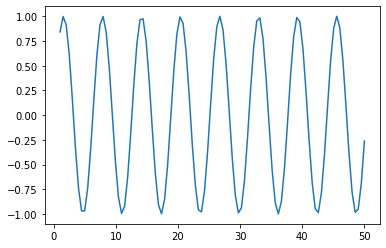

In [83]:
#make some data
x=np.linspace(1,50,100) # linspace(start,end,num_points) 
y=np.sin(x)

#a line graph:
plt.plot(x,y)

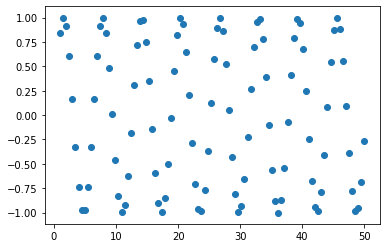

In [165]:
#a scatter plot
plt.scatter(x,y)

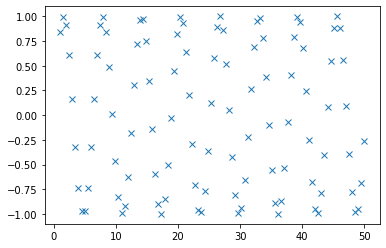

In [166]:
#another way to make a scatter plot
plt.plot(x,y,'x')

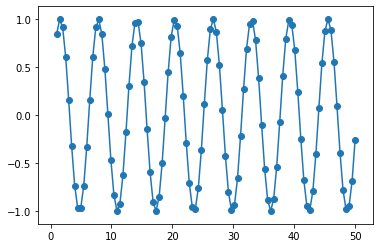

In [167]:
#by default all the plots go into the same figure. we can make a new figure by calling figure()
#we can also get a refrence to the figure

#WITHOUT calling figure()

#a line graph:
plt.plot(x,y)

#a scatter plot
plt.scatter(x,y)

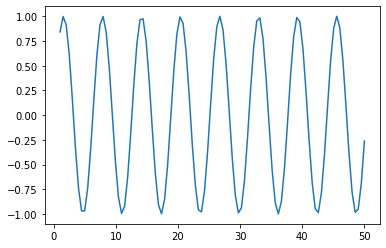

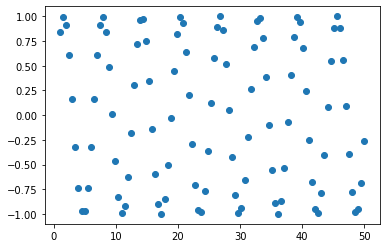

In [84]:
#calling figure()

#a line graph:
plt.plot(x,y)

fig=plt.figure()

#a scatter plot
plt.scatter(x,y)

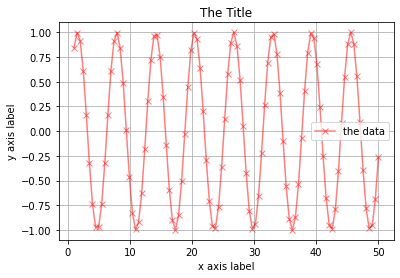

In [86]:
#plot the data, show data points as x's, connect them with a line, make it red and kinda see through
#name the data
plt.plot(x,y, 'x-', color='red', alpha=.5, label='the data')

#add a title
plt.title('The Title')

#name the axis
plt.xlabel('x axis label')
plt.ylabel('y axis label')

#the legend
plt.legend(loc='best') #loc = 'best' tries to make the legend not overlap the data

#turn a grid on
plt.grid()

#save the figure as an image
#this will create a ".png" file in the file location you run the code in 
plt.savefig('test_fig.png')

C:\Users\Steve Wu\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


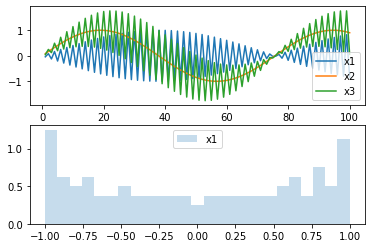

In [172]:
#subplots and multiple lines
from numpy import pi
t=np.linspace(1,100,100)
x1=np.sin(20./(2*pi) * t)
x2=np.sin(40./(2*pi)*t)
x3=x1+x2

plt.figure()
plt.subplot(2,1,1)
plt.plot(t,x1,label='x1')
plt.plot(t,x2,label='x2')
plt.plot(t,x3,label='x3')
plt.legend(loc='best')

plt.subplot(2,1,2)
#plot a histogram
#we save the histogram data but it is not needed to do so for plotting purposes
x1hist=plt.hist(x1,normed='true', bins=25, alpha=.25,label='x1')
plt.legend(loc='best')

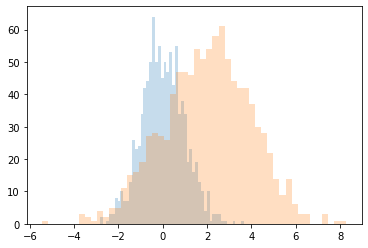

In [173]:
#more histograms
x1=np.random.randn(1000)
x2=2.0*np.random.randn(1000)+2

x1h=plt.hist(x1,bins=50,alpha=.25)
x2h=plt.hist(x2,bins=50,alpha=.25)